# A new SVR model

## Instructions

Now that you have built an SVR model, build a new one with fresh data (try one of [these datasets from Duke](https://www2.stat.duke.edu/~mw/ts_data_sets.html)). Annotate your work in a notebook, visualize the data and your model, and test its accuracy using appropriate plots and MAPE. Also try tweaking the different hyperparameters and also using different values for the timesteps.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [5]:
# load the dataset
trig = pd.read_csv('../kaggle_datasets/trig.csv',index_col = 'date',parse_dates= ['date']).drop(['Unnamed: 0','language','article'],axis=1)
trig.head()

,views
date,
2007-12-10,2573
2007-12-11,2443
2007-12-12,2392
2007-12-13,2350
2007-12-14,1856


In [3]:
trig.tail()

,views
date,
2021-02-25,2229
2021-02-26,1881
2021-02-27,1589
2021-02-28,1752
2021-03-01,1922


Prepare the data for modelling; creating numpy arrays for the features and label respectively.

Since the times are chronological, I can represent the time as a range from 1 as I do in the next code block

In [7]:
X = np.arange(1, len(trig) + 1).reshape(-1, 1)

In [8]:
y = trig['views'].values

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Create and train the SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predict on the test set
y_pred = svr.predict(X_test)



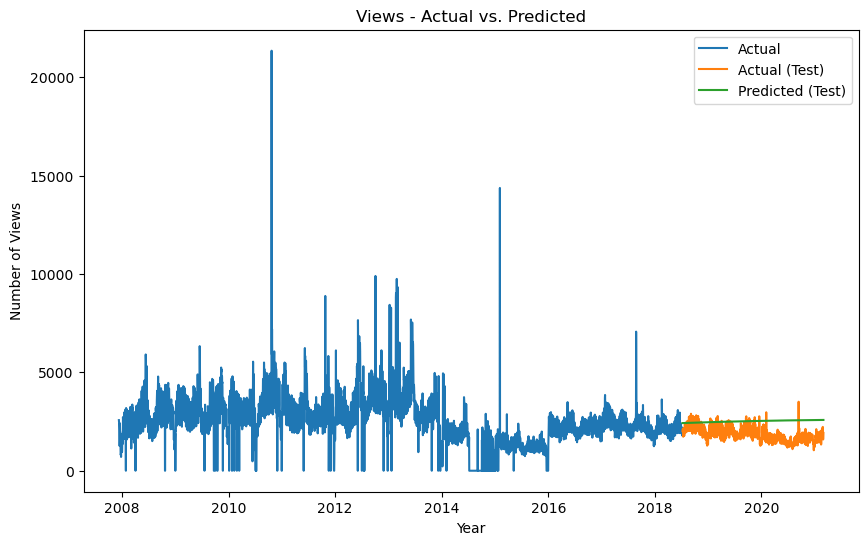

In [11]:
# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(trig.index[:len(y_train)], y_train, label='Actual')
plt.plot(trig.index[len(y_train):], y_test, label='Actual (Test)')
plt.plot(trig.index[len(y_train):], y_pred, label='Predicted (Test)')
plt.xlabel('Year')
plt.ylabel('Number of Views')
plt.title('Views - Actual vs. Predicted')
plt.legend()
plt.show()

Model Evaluation

In [14]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate Root Mean Square Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Square Error (RMSE): {rmse}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Squared Error: 525213.845970016
Root Mean Square Error (RMSE): 724.7163900244122
Mean Absolute Percentage Error (MAPE): 37.819489898443074%


From the plot and the metrics, the model did not perform so well. There's a need to tune the hyperparameters or even consider another model for the particular dataset. In general, we want the MAPE to be below 10%, though this can change depending on the specific dataset in question. 